## Introduction

This project explores a real-world Internet of Things (IoT) gas sensor dataset to design and analyze a data-driven monitoring application. The dataset consists of multiple sensor measurements collected over time, including gas sensor responses (R1–R8) as well as environmental variables such as temperature and humidity. Each recording represents an independent sensor run, reflecting realistic IoT data generated from physical devices operating in uncontrolled environments.

The overall objective of this project is to apply the concepts learned in this course to the full IoT data lifecycle. This includes understanding raw sensor data, analyzing temporal patterns and relationships between variables, and preparing the dataset for machine learning methods that can generate actionable insights. These insights will ultimately be presented through an IoT system design and a visualization dashboard.

This notebook focuses on the early analytical stages of the project, including data loading, cleaning, and exploratory analysis. The results of this analysis provide essential context for subsequent modeling decisions and system design choices made later in the project.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Data Loading

The dataset is loaded from a local file. Because the file uses mixed whitespace delimiters, a flexible separator is used to correctly parse all columns.


In [ ]:
df_raw = pd.read_csv("../data/HT_Sensor_dataset.csv", sep=r"\s+")
df_raw.head()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


## Dataset Overview

In [8]:
df_raw.shape

(928991, 12)

In [9]:
df_raw.columns

Index(['id', 'time', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp.',
       'Humidity'],
      dtype='object')

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928991 entries, 0 to 928990
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        928991 non-null  int64  
 1   time      928991 non-null  float64
 2   R1        928991 non-null  float64
 3   R2        928991 non-null  float64
 4   R3        928991 non-null  float64
 5   R4        928991 non-null  float64
 6   R5        928991 non-null  float64
 7   R6        928991 non-null  float64
 8   R7        928991 non-null  float64
 9   R8        928991 non-null  float64
 10  Temp.     928991 non-null  float64
 11  Humidity  928991 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 85.1 MB


In [11]:
df_raw.describe(include="all")

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
count,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,49.256372,0.403261,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023
std,28.453089,0.859865,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784
min,0.000000,-0.999999,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400
25%,25.000000,-0.320817,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100
50%,49.000000,0.366136,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800
75%,73.000000,1.055152,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500
max,99.000000,3.309882,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500


## Data Preparation

Minimal preprocessing is performed to standardize column names, ensure numeric data types, and preserve the correct temporal ordering of each sensor recording.


In [12]:
# Rename temperature column for consistency
df_raw = df_raw.rename(columns={"Temp.": "Temp"})

# Create a working copy
df = df_raw.copy()

# Convert all non-ID columns to numeric
numeric_cols = [c for c in df.columns if c != "id"]
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Sort by recording ID and time
df = df.sort_values(["id", "time"]).reset_index(drop=True)

df.dtypes

id            int64
time        float64
R1          float64
R2          float64
R3          float64
R4          float64
R5          float64
R6          float64
R7          float64
R8          float64
Temp        float64
Humidity    float64
dtype: object

## Missing Values Analysis

Missing values are examined to determine whether imputation or removal is required before analysis.


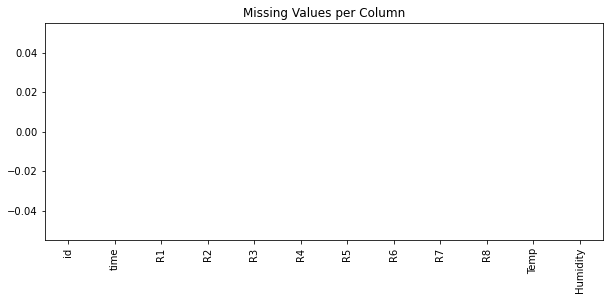

In [13]:
df.isna().sum().plot.bar(figsize=(10, 4))
plt.title("Missing Values per Column")
plt.show()

## Descriptive Statistics After Preparation

After cleaning and type conversion, summary statistics are recalculated.


In [14]:
df.describe()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
count,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,49.256372,0.403261,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023
std,28.453089,0.859865,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784
min,0.000000,-0.999999,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400
25%,25.000000,-0.320817,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100
50%,49.000000,0.366136,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800
75%,73.000000,1.055152,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500
max,99.000000,3.309882,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500


## Time-Series Visualization Strategy

The dataset contains many separate recordings identified by unique IDs. Plotting all time series simultaneously results in dense and difficult-to-interpret figures. 

To maintain interpretability, time-series and moving-average plots are shown using a single representative recording, while summary statistics and correlation analysis use the full dataset. This approach was selected to maintain interpretability and aligns with common practices for exploratory analysis of dense time-series data.


In [15]:
df_single = df[df["id"] == 0].copy()


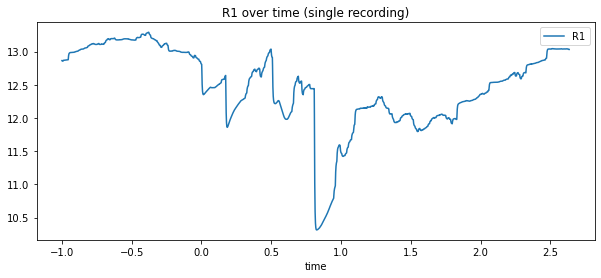

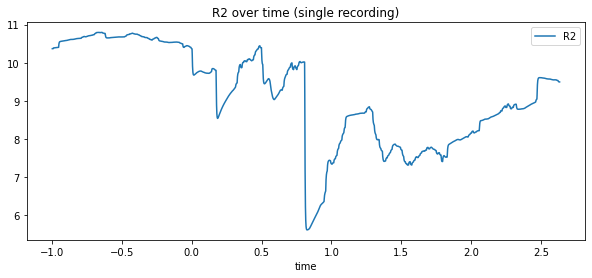

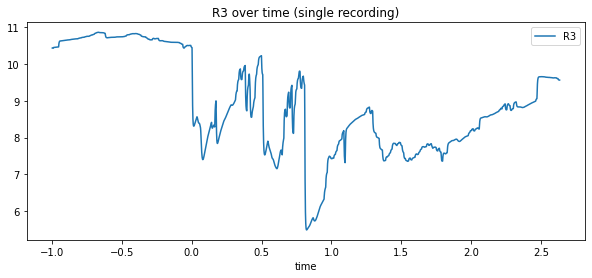

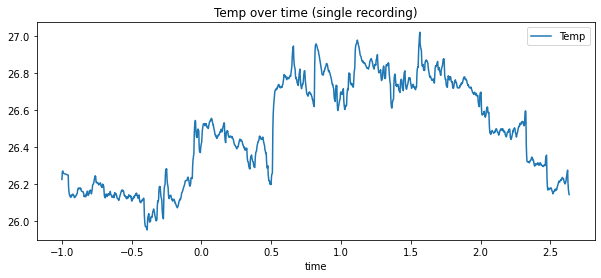

In [16]:
vars_to_plot = ["R1", "R2", "R3", "Temp"]

for col in vars_to_plot:
    df_single.plot(
        x="time",
        y=col,
        title=f"{col} over time (single recording)",
        figsize=(10, 4)
    )
    plt.show()


## Moving Average Smoothing

Moving averages are applied to reduce short-term noise and highlight longer-term trends in sensor behavior.


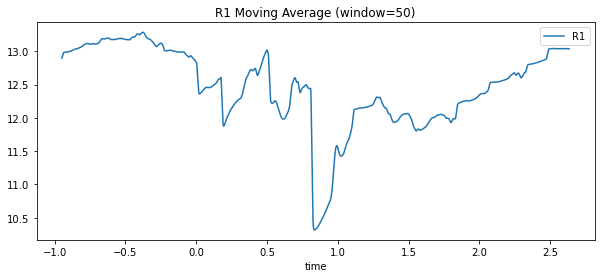

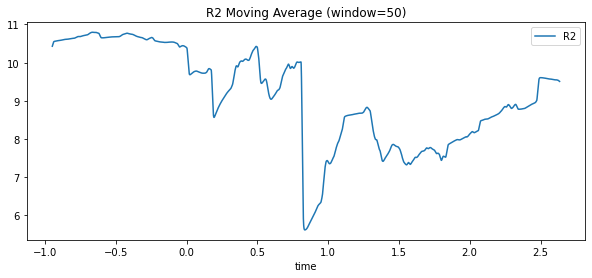

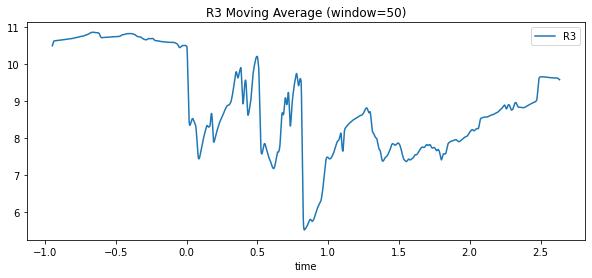

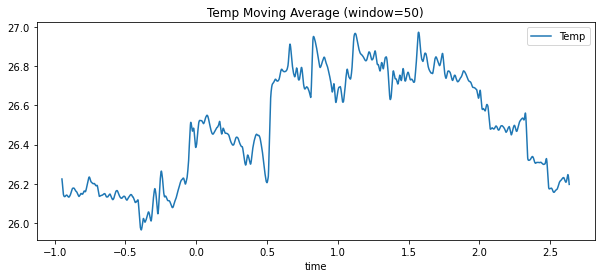

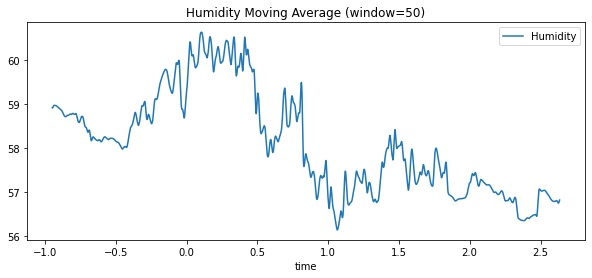

In [17]:
vars_to_plot = ["R1", "R2", "R3", "Temp", "Humidity"]

window = 50

df_single_ma = df_single.copy()
for col in vars_to_plot:
    df_single_ma[col] = df_single_ma[col].rolling(window).mean()

for col in vars_to_plot:
    df_single_ma.plot(
        x="time",
        y=col,
        title=f"{col} Moving Average (window={window})",
        figsize=(10, 4)
    )
    plt.show()


The single-recording time-series plots reveal clear temporal patterns across the gas sensors, including periods of relative stability, gradual drift, and abrupt drops that likely correspond to sensor response events or environmental changes. These patterns are difficult to observe when all recordings are plotted simultaneously due to overplotting and visual clutter.

Applying a moving average with a window size of 50 further smooths short-term fluctuations while preserving the underlying trends in each signal. This smoothing highlights longer-term behavior, making shifts and recovery phases more interpretable without introducing artificial structure. For completeness and consistency with the system design, humidity is included in the moving average analysis as an environmental variable; however, its trends are smoother and show weaker relationships with gas sensor responses compared to the primary sensor channels. Overall, the combination of single-record visualization and moving-average smoothing provides a clearer view of sensor dynamics and serves as an effective exploratory step prior to modeling.


## Correlation Analysis

Correlation analysis is performed using the full dataset to examine relationships between gas sensors and environmental variables.


In [18]:
corr_cols = ["R1","R2","R3","R4","R5","R6","R7","R8","Temp","Humidity"]
df[corr_cols].corr(method="spearman")


,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
R1,1.000000,0.868265,0.847338,0.847201,0.359923,0.207611,0.536988,0.468268,-0.232239,-0.305814
R2,0.868265,1.000000,0.968964,0.984298,0.323480,0.173811,0.577116,0.514216,-0.110458,-0.203324
R3,0.847338,0.968964,1.000000,0.984472,0.337339,0.206236,0.627864,0.552997,-0.060229,-0.191344
R4,0.847201,0.984298,0.984472,1.000000,0.331279,0.189105,0.612466,0.540338,-0.082687,-0.209749
R5,0.359923,0.323480,0.337339,0.331279,1.000000,0.056823,0.185287,0.184096,-0.062862,0.044766
R6,0.207611,0.173811,0.206236,0.189105,0.056823,1.000000,0.184228,0.144230,-0.078597,-0.080108
R7,0.536988,0.577116,0.627864,0.612466,0.185287,0.184228,1.000000,0.879342,0.006655,-0.161687
R8,0.468268,0.514216,0.552997,0.540338,0.184096,0.144230,0.879342,1.000000,0.036564,-0.102729
Temp,-0.232239,-0.110458,-0.060229,-0.082687,-0.062862,-0.078597,0.006655,0.036564,1.000000,0.239441
Humidity,-0.305814,-0.203324,-0.191344,-0.209749,0.044766,-0.080108,-0.161687,-0.102729,0.239441,1.000000


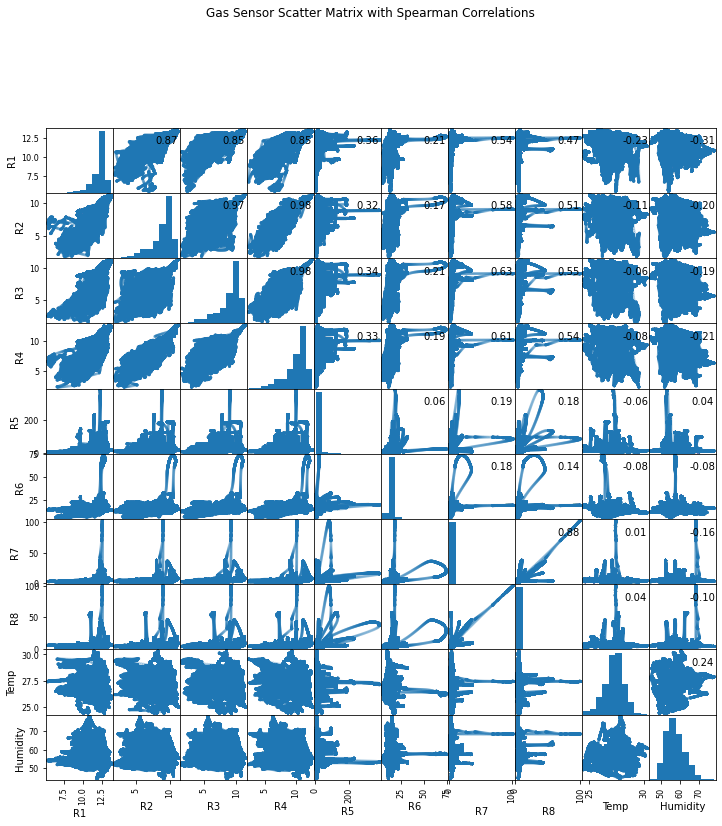

In [19]:
axes = pd.plotting.scatter_matrix(
    df[corr_cols],
    alpha=0.3,
    figsize=(12, 12)
)

corr_np = df[corr_cols].corr(method="spearman").to_numpy()

for i, j in zip(*np.triu_indices_from(corr_np, k=1)):
    axes[i, j].annotate(
        f"{corr_np[i, j]:.2f}",
        (0.8, 0.8),
        xycoords="axes fraction",
        ha="center",
        va="center"
    )

plt.suptitle("Gas Sensor Scatter Matrix with Spearman Correlations", y=1.02)
plt.show()


The correlation analysis reveals strong positive relationships among several of the gas sensor readings, particularly between sensors R1–R4 and R2–R4, suggesting that these sensors may be responding to similar environmental conditions or detecting related gas concentrations. In contrast, sensors such as R5 and R6 show weaker correlations with the primary sensor group, indicating more independent or localized behavior.

Temperature and humidity exhibit generally weak correlations with most gas sensors, suggesting that environmental conditions may influence sensor readings indirectly rather than driving them directly. The scatter matrix further supports these findings, showing tight, monotonic relationships where correlations are strong and more diffuse patterns where correlations are weak. Overall, these results indicate potential redundancy among some sensors and provide useful insight for feature selection and model design in later stages of the project.


## Save Processed Data

In [ ]:
# Save dataset with only needed columns for machine learning
df_single_ma.to_csv('.//data/Cleaned_HT_Sensor_Dataset.csv', index=False)